In [4]:
!pip install mlflow

You should consider upgrading via the 'C:\Users\sanji\Desktop\FAANG\vnev\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install xgboost

You should consider upgrading via the 'C:\Users\sanji\Desktop\FAANG\vnev\Scripts\python.exe -m pip install --upgrade pip' command.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

faang_data=pd.read_csv('faangdata.csv')
faang_data.head()

,company,ticker,date,open,high,low,close,adj_close,volume,market_cap,...,target_price,free_cash_flow,operating_margin,profit_margin,quick_ratio,price_to_book_ratio,enterprise_value,total_debt,beta_5y,annual_dividend_rate
0,Apple,AAPL,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3575090000000,...,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3569140000000,101304000000,1.239,1.0
1,Apple,AAPL,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3575090000000,...,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3569140000000,101304000000,1.239,1.0
2,Apple,AAPL,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3575090000000,...,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3569140000000,101304000000,1.239,1.0
3,Apple,AAPL,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3575090000000,...,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3569140000000,101304000000,1.239,1.0
4,Apple,AAPL,2005-01-18,1.247321,1.262500,1.209821,1.261607,1.065396,1006460000,3575090000000,...,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3569140000000,101304000000,1.239,1.0


In [60]:
faang_data.info()
faang_data['date']=pd.to_datetime(faang_data['date'],format='%Y-%m-%d', errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18603 entries, 0 to 18602
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company                   18603 non-null  object 
 1   ticker                    18603 non-null  object 
 2   date                      18603 non-null  object 
 3   open                      18603 non-null  float64
 4   high                      18603 non-null  float64
 5   low                       18603 non-null  float64
 6   close                     18603 non-null  float64
 7   adj_close                 18603 non-null  float64
 8   volume                    18603 non-null  int64  
 9   market_cap                18603 non-null  int64  
 10  pe_ratio                  18603 non-null  float64
 11  beta                      18603 non-null  float64
 12  eps                       18603 non-null  float64
 13  forward_pe                18603 non-null  float64
 14  net_in

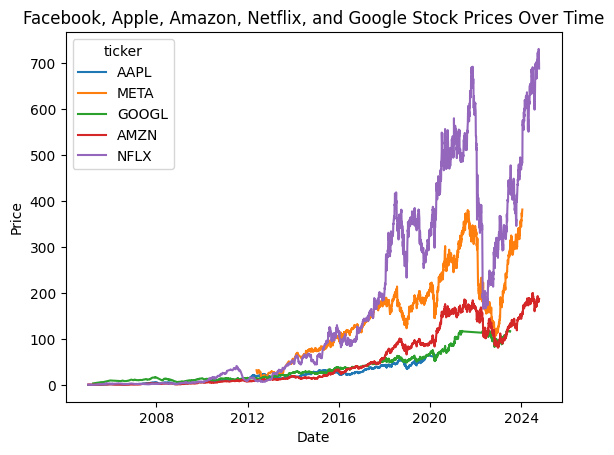

In [11]:
sns.lineplot(data=faang_data,x='date',y='close',hue='ticker')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Facebook, Apple, Amazon, Netflix, and Google Stock Prices Over Time')
plt.show()

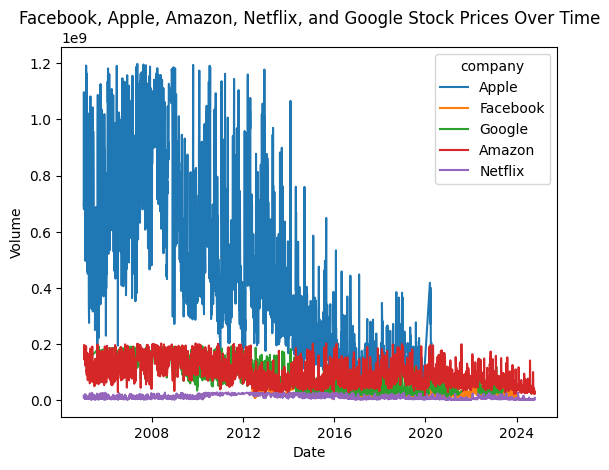

In [12]:
sns.lineplot(data=faang_data,x='date',y='volume',hue='company')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title('Facebook, Apple, Amazon, Netflix, and Google Stock Prices Over Time')
plt.show()

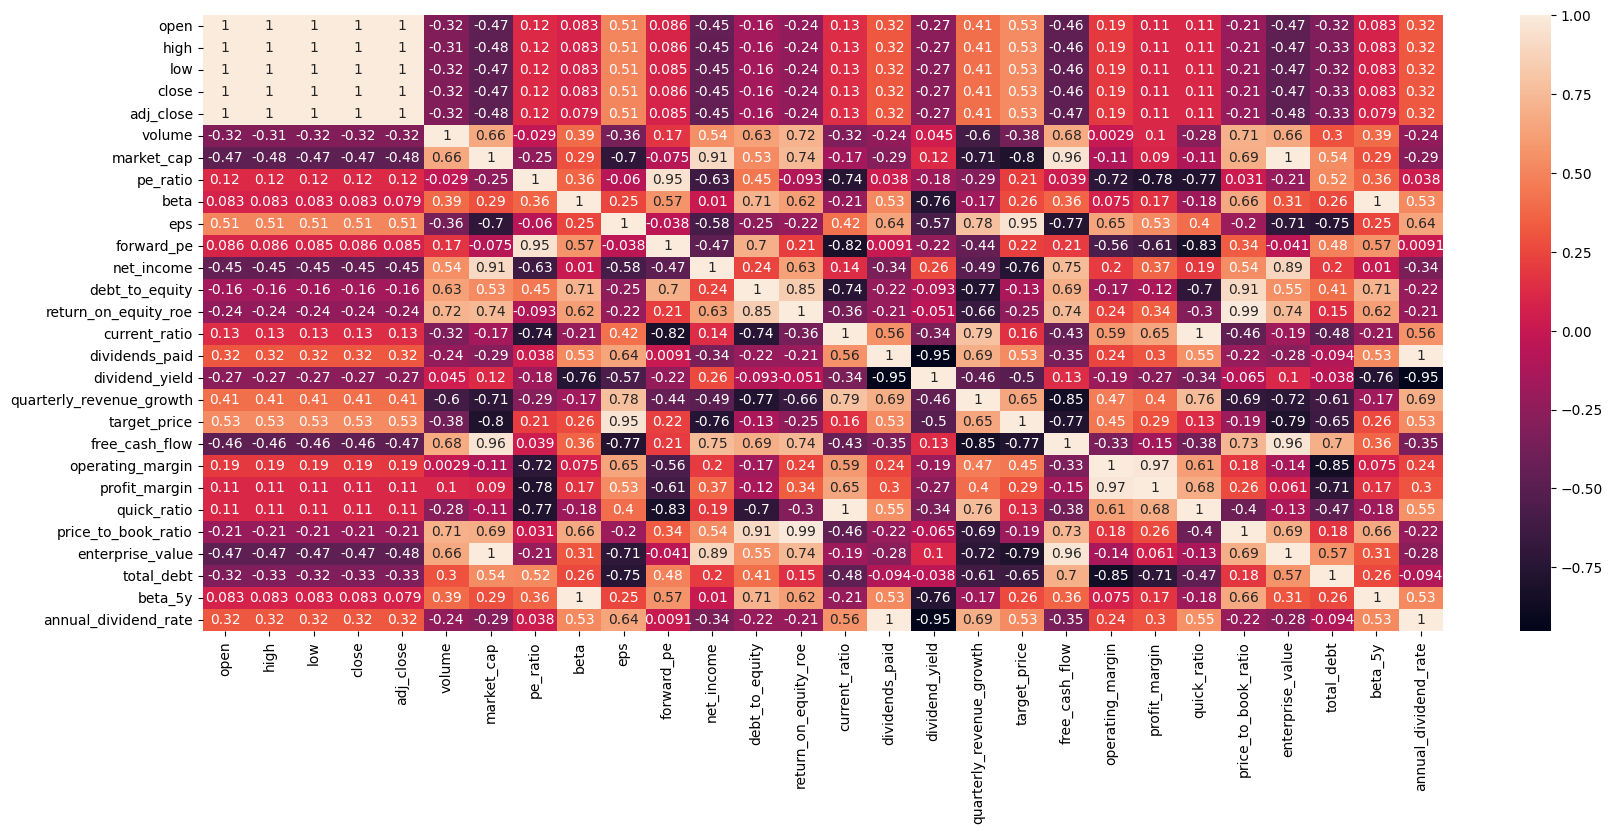

In [13]:
numericalcolumns=faang_data.select_dtypes(include=['float64','int64']).columns
heatmap_data=faang_data[numericalcolumns].corr()
plt.figure(figsize=(20,8))
sns.heatmap(heatmap_data,annot=True)
plt.show()

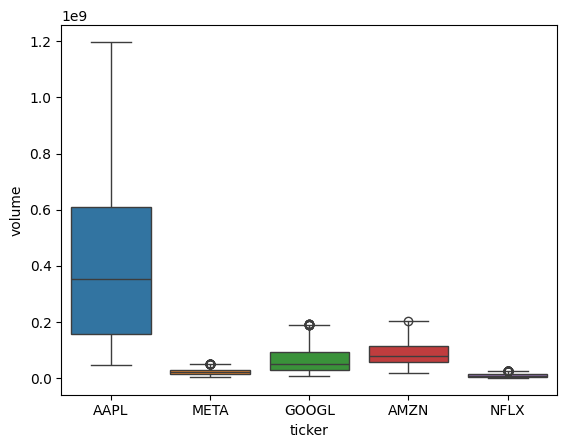

In [14]:
sns.boxplot(data=faang_data,x='ticker',y='volume',hue='ticker')
plt.show()

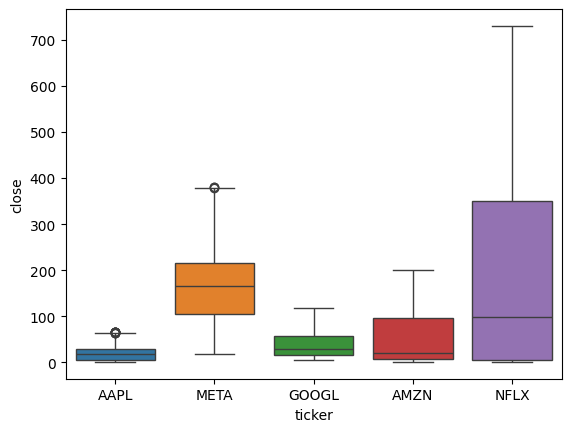

In [15]:
sns.boxplot(data=faang_data,x='ticker',y='close',hue='ticker')
plt.show()

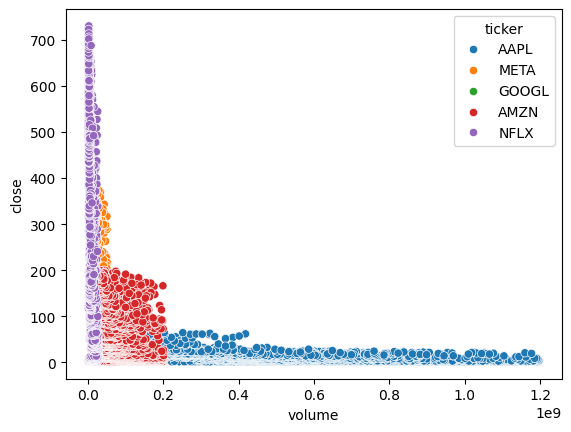

In [16]:
sns.scatterplot(data=faang_data,x='volume',y='close',hue='ticker')
plt.show()

In [17]:
faang_data.drop('analyst_recommendation',axis=1,inplace=True)

In [18]:
faang_data.columns

Index(['company', 'ticker', 'date', 'open', 'high', 'low', 'close',
       'adj_close', 'volume', 'market_cap', 'pe_ratio', 'beta', 'eps',
       'forward_pe', 'net_income', 'debt_to_equity', 'return_on_equity_roe',
       'current_ratio', 'dividends_paid', 'dividend_yield',
       'quarterly_revenue_growth', 'target_price', 'free_cash_flow',
       'operating_margin', 'profit_margin', 'quick_ratio',
       'price_to_book_ratio', 'enterprise_value', 'total_debt', 'beta_5y',
       'annual_dividend_rate'],
      dtype='object')

In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def encode(dataframe):
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    le = LabelEncoder()
    company_encoded = ohe.fit_transform(dataframe[['company']])
    company_encoded_df = pd.DataFrame(company_encoded, columns=ohe.get_feature_names_out(['company']))
    dataframe = pd.concat([dataframe.drop(['company'], axis=1), company_encoded_df], axis=1)
    ticker_encoded = ohe.fit_transform(dataframe[['ticker']])
    ticker_encoded_df = pd.DataFrame(ticker_encoded, columns=ohe.get_feature_names_out(['ticker']))
    dataframe = pd.concat([dataframe.drop(['ticker'], axis=1), ticker_encoded_df], axis=1)
    columns = [
    'market_cap', 'pe_ratio', 'beta', 'eps', 'forward_pe', 'net_income', 'debt_to_equity',
    'return_on_equity_roe', 'current_ratio', 'dividends_paid', 'dividend_yield',
    'quarterly_revenue_growth', 'target_price', 'free_cash_flow', 'operating_margin',
    'profit_margin', 'quick_ratio', 'price_to_book_ratio', 'enterprise_value', 
    'total_debt', 'beta_5y', 'annual_dividend_rate']
    
    for column in columns:
        dataframe[column] = le.fit_transform(dataframe[column])
    
    return dataframe


faang_data = encode(faang_data)

In [66]:
Apple= faang_data[faang_data['ticker_AAPL'] == 1]
Facebook= faang_data[faang_data['ticker_META'] == 1]
Amazon= faang_data[faang_data['ticker_AMZN'] == 1]
Netflix= faang_data[faang_data['ticker_NFLX'] == 1]
Google= faang_data[faang_data['ticker_GOOGL'] == 1]

In [69]:
Apple.drop(['ticker_AMZN', 'ticker_GOOGL', 'ticker_META', 'ticker_NFLX','company_Amazon','company_Facebook','company_Google','company_Netflix'], axis=1, inplace=True)

C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\2277185958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple.drop(['ticker_AMZN', 'ticker_GOOGL', 'ticker_META', 'ticker_NFLX','company_Amazon','company_Facebook','company_Google','company_Netflix'], axis=1, inplace=True)


In [70]:
Amazon.drop(['ticker_AAPL', 'ticker_GOOGL', 'ticker_META', 'ticker_NFLX','company_Apple','company_Facebook','company_Google','company_Netflix'], axis=1, inplace=True)

C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\2369836624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amazon.drop(['ticker_AAPL', 'ticker_GOOGL', 'ticker_META', 'ticker_NFLX','company_Apple','company_Facebook','company_Google','company_Netflix'], axis=1, inplace=True)


In [71]:
Facebook.drop(['ticker_AAPL','ticker_AMZN', 'ticker_GOOGL','ticker_NFLX','company_Apple','company_Amazon','company_Google','company_Netflix'], axis=1, inplace=True)

C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\1981349363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Facebook.drop(['ticker_AAPL','ticker_AMZN', 'ticker_GOOGL','ticker_NFLX','company_Apple','company_Amazon','company_Google','company_Netflix'], axis=1, inplace=True)


In [72]:
Google.drop(['ticker_AAPL','ticker_AMZN', 'ticker_META','ticker_NFLX','company_Apple','company_Amazon','company_Facebook','company_Netflix'], axis=1, inplace=True)

C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\1087475338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Google.drop(['ticker_AAPL','ticker_AMZN', 'ticker_META','ticker_NFLX','company_Apple','company_Amazon','company_Facebook','company_Netflix'], axis=1, inplace=True)


In [73]:
Netflix.drop(['ticker_AAPL','ticker_AMZN', 'ticker_META','ticker_GOOGL','company_Apple','company_Amazon','company_Facebook','company_Google'], axis=1, inplace=True)

C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\1564128503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix.drop(['ticker_AAPL','ticker_AMZN', 'ticker_META','ticker_GOOGL','company_Apple','company_Amazon','company_Facebook','company_Google'], axis=1, inplace=True)


In [74]:
Netflix

,date,open,high,low,close,adj_close,volume,market_cap,pe_ratio,beta,...,operating_margin,profit_margin,quick_ratio,price_to_book_ratio,enterprise_value,total_debt,beta_5y,annual_dividend_rate,company_Netflix,ticker_NFLX
14298,2005-01-03,1.800000,1.800000,1.645714,1.702857,1.702857,11334400,0,3,2,...,2,1,2,3,0,0,2,2,1.0,1.0
14299,2005-01-04,1.702857,1.707143,1.607143,1.665714,1.665714,17352300,0,3,2,...,2,1,2,3,0,0,2,2,1.0,1.0
14300,2005-01-05,1.677143,1.677143,1.584286,1.600000,1.600000,12732300,0,3,2,...,2,1,2,3,0,0,2,2,1.0,1.0
14301,2005-01-06,1.600000,1.624286,1.572857,1.578571,1.578571,8273300,0,3,2,...,2,1,2,3,0,0,2,2,1.0,1.0
14302,2005-01-07,1.587143,1.650000,1.571429,1.588571,1.588571,7490700,0,3,2,...,2,1,2,3,0,0,2,2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18598,2024-10-11,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,0,3,2,...,2,1,2,3,0,0,2,2,1.0,1.0
18599,2024-10-14,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,0,3,2,...,2,1,2,3,0,0,2,2,1.0,1.0
18600,2024-10-15,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,0,3,2,...,2,1,2,3,0,0,2,2,1.0,1.0
18601,2024-10-16,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,0,3,2,...,2,1,2,3,0,0,2,2,1.0,1.0


In [82]:
def coorelation(data):
    for frames in data:
        correlation_with_close=frames[['open','high','low','adj_close','volume','close']].corr()['close'].sort_values(ascending=False)
        print(f'\nFeatures:')
        threshold=0.2
        selectedfeatures=correlation_with_close[(abs(correlation_with_close)>threshold) | (abs(correlation_with_close)<-threshold)]
        print(selectedfeatures)

data=[Apple,Amazon,Facebook,Google,Netflix]
coorelation(data)


Features:
close        1.000000
low          0.999890
high         0.999858
open         0.999773
adj_close    0.998901
volume      -0.734452
Name: close, dtype: float64

Features:
close        1.000000
adj_close    1.000000
low          0.999897
high         0.999891
open         0.999766
volume      -0.386172
Name: close, dtype: float64

Features:
close        1.000000
adj_close    1.000000
low          0.999739
high         0.999721
open         0.999402
volume      -0.387112
Name: close, dtype: float64

Features:
adj_close    1.000000
close        1.000000
low          0.999859
high         0.999856
open         0.999685
volume      -0.624966
Name: close, dtype: float64

Features:
close        1.000000
adj_close    1.000000
low          0.999858
high         0.999850
open         0.999671
volume      -0.455328
Name: close, dtype: float64


In [115]:
def split_date(data):
    for df in data:
        df['month']=pd.to_datetime(df['date']).dt.month
        df['year']=pd.to_datetime(df['date']).dt.year
        df['day']=pd.to_datetime(df['date']).dt.day
        df.drop('date',inplace=True,axis=1)
        return df

data=[Netflix]
split_date(data)

C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\1771372352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=pd.to_datetime(df['date']).dt.month
C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\1771372352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=pd.to_datetime(df['date']).dt.year
C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\1771372352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,open,high,low,close,adj_close,volume,market_cap,pe_ratio,beta,eps,...,price_to_book_ratio,enterprise_value,total_debt,beta_5y,annual_dividend_rate,company_Netflix,ticker_NFLX,month,year,day
14298,1.800000,1.800000,1.645714,1.702857,1.702857,11334400,0,3,2,3,...,3,0,0,2,2,1.0,1.0,1,2005,3
14299,1.702857,1.707143,1.607143,1.665714,1.665714,17352300,0,3,2,3,...,3,0,0,2,2,1.0,1.0,1,2005,4
14300,1.677143,1.677143,1.584286,1.600000,1.600000,12732300,0,3,2,3,...,3,0,0,2,2,1.0,1.0,1,2005,5
14301,1.600000,1.624286,1.572857,1.578571,1.578571,8273300,0,3,2,3,...,3,0,0,2,2,1.0,1.0,1,2005,6
14302,1.587143,1.650000,1.571429,1.588571,1.588571,7490700,0,3,2,3,...,3,0,0,2,2,1.0,1.0,1,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18598,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,0,3,2,3,...,3,0,0,2,2,1.0,1.0,10,2024,11
18599,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,0,3,2,3,...,3,0,0,2,2,1.0,1.0,10,2024,14
18600,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,0,3,2,3,...,3,0,0,2,2,1.0,1.0,10,2024,15
18601,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,0,3,2,3,...,3,0,0,2,2,1.0,1.0,10,2024,16


In [90]:
Apple.drop(['analyst_recommendation'],axis=1,inplace=True)

C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\3807538723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple.drop(['analyst_recommendation'],axis=1,inplace=True)


In [96]:
Amazon.drop(['analyst_recommendation'],axis=1,inplace=True)


C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\3049741165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amazon.drop(['analyst_recommendation'],axis=1,inplace=True)


In [97]:
Google.drop(['analyst_recommendation'],axis=1,inplace=True)
Netflix.drop(['analyst_recommendation'],axis=1,inplace=True)
Facebook.drop(['analyst_recommendation'],axis=1,inplace=True)

C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\2274477271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Google.drop(['analyst_recommendation'],axis=1,inplace=True)
C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\2274477271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix.drop(['analyst_recommendation'],axis=1,inplace=True)
C:\Users\sanji\AppData\Local\Temp\ipykernel_2420\2274477271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [117]:
Apple.to_csv('Apple.csv',index=False)
Amazon.to_csv('Amazon.csv',index=False)
Google.to_csv('Google.csv',index=False)
Netflix.to_csv('Netflix.csv',index=False)
Facebook.to_csv('Facebook.csv',index=False)

In [123]:
Apple_data=pd.read_csv('Apple.csv')
Amazon_data=pd.read_csv('Amazon.csv')
Google_data=pd.read_csv('Google.csv')
Netflix_data=pd.read_csv('Netflix.csv')
Facebook_data=pd.read_csv('Facebook.csv')

In [152]:
def featueselection(data):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.preprocessing import StandardScaler
    X=data.drop('close',axis=1)
    y=data['close']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    rfr=RandomForestRegressor(n_estimators=1000,random_state=42)
    rfr.fit(X_train,y_train)
    feature_names=X.columns
    importance=rfr.feature_importances_
    featureimportance_df=pd.DataFrame({'Feature':feature_names,'Importance':importance}).sort_values(by='Importance',ascending=False)
    print(featureimportance_df)

featueselection(Netflix_data)

                     Feature    Importance
3                  adj_close  9.273735e-01
1                       high  3.004927e-02
2                        low  2.717145e-02
0                       open  1.540312e-02
4                     volume  9.552517e-07
31                       day  8.299237e-07
29                     month  5.613528e-07
30                      year  3.313085e-07
8                        eps  0.000000e+00
9                 forward_pe  0.000000e+00
10                net_income  0.000000e+00
11            debt_to_equity  0.000000e+00
12      return_on_equity_roe  0.000000e+00
5                 market_cap  0.000000e+00
6                   pe_ratio  0.000000e+00
7                       beta  0.000000e+00
15            dividend_yield  0.000000e+00
14            dividends_paid  0.000000e+00
13             current_ratio  0.000000e+00
16  quarterly_revenue_growth  0.000000e+00
20             profit_margin  0.000000e+00
17              target_price  0.000000e+00
18         

In [153]:
import mlflow
def linearmodel(data,columns):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
    X=data[columns]
    y=data['close']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    LRModel=LinearRegression()
    LRModel.fit(X_train,y_train)
    y_pred=LRModel.predict(X_test)
    print(f'Mean Absolute Error:{mean_absolute_error(y_test,y_pred)}')
    print(f'R2 Score:{r2_score(y_test,y_pred)}')
    print(f'Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred)}')
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred))
        mlflow.sklearn.log_model(LRModel,'LinearRegression')
     

linearmodel(Netflix_data,['open','high','low','adj_close','volume'])    

2025/01/21 23:02:44 INFO mlflow.tracking.fluent: Experiment with name 'Netflix' does not exist. Creating a new experiment.


Mean Absolute Error:5.0042045613783796e-14
R2 Score:1.0
Root Mean Squared Error:6.633944675946413e-14


2025/01/21 23:02:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [154]:
def decisiontreemodel(data,columns):
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
    X=data[columns]
    y=data['close']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    DTModel=DecisionTreeRegressor()
    DTModel.fit(X_train,y_train)
    y_pred=DTModel.predict(X_test)
    print(f'Mean Absolute Error:{mean_absolute_error(y_test,y_pred)}')
    print(f'R2 Score:{r2_score(y_test,y_pred)}')
    print(f'Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred)}')
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred))
        mlflow.sklearn.log_model(DTModel,'DecisionTreeRegressor')

decisiontreemodel(Netflix_data,['open','high','low','adj_close','volume'])

Mean Absolute Error:0.23091235998141663
R2 Score:0.9999906326946406
Root Mean Squared Error:0.6180292458848995


2025/01/21 23:03:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [155]:
def randomforestmodel(data,columns):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
    X=data[columns]
    y=data['close']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    RFModel=RandomForestRegressor(n_estimators=1000,random_state=42)
    RFModel.fit(X_train,y_train)
    y_pred=RFModel.predict(X_test)
    print(f'Mean Absolute Error:{mean_absolute_error(y_test,y_pred)}')
    print(f'R2 Score:{r2_score(y_test,y_pred)}')
    print(f'Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred)}')
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred))
        mlflow.sklearn.log_model(RFModel,'RandomForestRegressor')

randomforestmodel(Netflix_data,['open','high','low','adj_close','volume'])

Mean Absolute Error:0.1702050675531307
R2 Score:0.9999956481991679
Root Mean Squared Error:0.421246391346786


2025/01/21 23:05:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


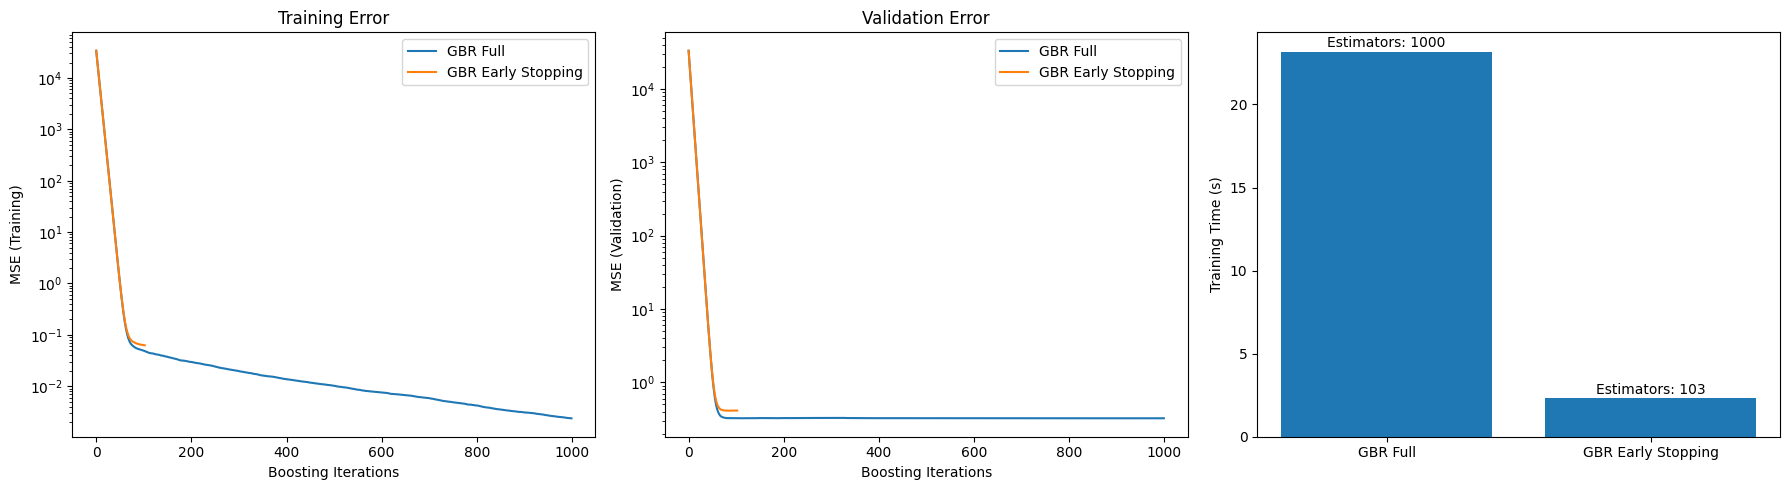

MAE: 0.2773264141154588
R2: 0.9999920521698065
RMSE: 0.5692800675166747


2025/01/21 23:06:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,root_mean_squared_error
import time
def gradientboostingmodel(data, feature_columns, target_column='close'):
    # Splitting data
    X = data[feature_columns]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Model parameters
    parameters = dict(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42)

    # Models
    gbr_full = GradientBoostingRegressor(**parameters)
    gbr_early_stopping = GradientBoostingRegressor(
        **parameters, validation_fraction=0.1, n_iter_no_change=10
    )

    # Training models
    start_time_full = time.time()
    gbr_full.fit(X_train, y_train)
    training_time_full = time.time() - start_time_full

    start_time_early = time.time()
    gbr_early_stopping.fit(X_train, y_train)
    training_time_early_stopping = time.time() - start_time_early

    # Tracking errors
    train_errors_full, val_errors_full = [], []
    train_errors_early, val_errors_early = [], []

    for train_pred, val_pred in zip(
        gbr_full.staged_predict(X_train), gbr_full.staged_predict(X_test)
    ):
        train_errors_full.append(mean_squared_error(y_train, train_pred))
        val_errors_full.append(mean_squared_error(y_test, val_pred))

    for train_pred, val_pred in zip(
        gbr_early_stopping.staged_predict(X_train), gbr_early_stopping.staged_predict(X_test)
    ):
        train_errors_early.append(mean_squared_error(y_train, train_pred))
        val_errors_early.append(mean_squared_error(y_test, val_pred))

    # Plotting
    fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

    axes[0].plot(train_errors_full, label="GBR Full")
    axes[0].plot(train_errors_early, label="GBR Early Stopping")
    axes[0].set_xlabel("Boosting Iterations")
    axes[0].set_ylabel("MSE (Training)")
    axes[0].set_yscale("log")
    axes[0].legend()
    axes[0].set_title("Training Error")

    axes[1].plot(val_errors_full, label="GBR Full")
    axes[1].plot(val_errors_early, label="GBR Early Stopping")
    axes[1].set_xlabel("Boosting Iterations")
    axes[1].set_ylabel("MSE (Validation)")
    axes[1].set_yscale("log")
    axes[1].legend()
    axes[1].set_title("Validation Error")

    training_times = [training_time_full, training_time_early_stopping]
    labels = ["GBR Full", "GBR Early Stopping"]
    bars = axes[2].bar(labels, training_times)
    axes[2].set_ylabel("Training Time (s)")

    for bar, n_estimators in zip(
        bars, [gbr_full.n_estimators_, gbr_early_stopping.n_estimators_]
    ):
        height = bar.get_height()
        axes[2].text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.1,
            f"Estimators: {n_estimators}",
            ha="center",
            va="bottom",
        )

    plt.tight_layout()
    plt.show()

    # Final Model with Optimal Estimators
    optimal_n_estimators = gbr_early_stopping.n_estimators_
    final_model = GradientBoostingRegressor(
        n_estimators=optimal_n_estimators,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
    )
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse =root_mean_squared_error(y_test, y_pred)

    print(f"MAE: {mae}")
    print(f"R2: {r2}")
    print(f"RMSE: {rmse}")
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',feature_columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred))
        mlflow.sklearn.log_model(final_model,'GradientBoostingRegressor')
        
gradientboostingmodel(Netflix_data, ['open', 'high', 'low', 'adj_close', 'volume'])


In [157]:
def xgbmodel(data,columns):
    from sklearn.model_selection import train_test_split
    from xgboost import XGBRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
    X=data[columns]
    y=data['close']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    xgb=XGBRegressor(objective="reg:squarederror",n_estimators=2000,seed=123,max_depth=5,learning_rate=0.1,random_state=42)


    xgb.fit(X_train,y_train)
    y_pred_xgb=xgb.predict(X_test)


    mae5=mean_absolute_error(y_test,y_pred_xgb)
    r25=r2_score(y_test,y_pred_xgb)
    rmse5=root_mean_squared_error(y_test,y_pred_xgb)
    print(f'Mean Absolute Error: {mae5}')
    print(f'R-squared: {r25}')
    print(f'RMSE: {rmse5}')
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred_xgb))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred_xgb))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred_xgb))
        mlflow.sklearn.log_model(xgb,'XGBRegressor')

xgbmodel(Netflix_data,['open','high','low','adj_close','volume'])

Mean Absolute Error: 0.7890723355075376
R-squared: 0.9999423406724532
RMSE: 1.5333329718531261


2025/01/21 23:07:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
